# Linear Regression improved

We saw how to create a very simple best fit line.

Now we will consider overfitting, underfitting, model evaluation, etc.!

## Let's import useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### More business questions...

- Previously, we explored the relationship between **total** advertising spend (1 feature) and **sales**. 


- Now we want to expand this to **"What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?"**

### Multiple Features (N-Dimensional)

Now we need to model 3 features and assess individually its impact on the output variable.

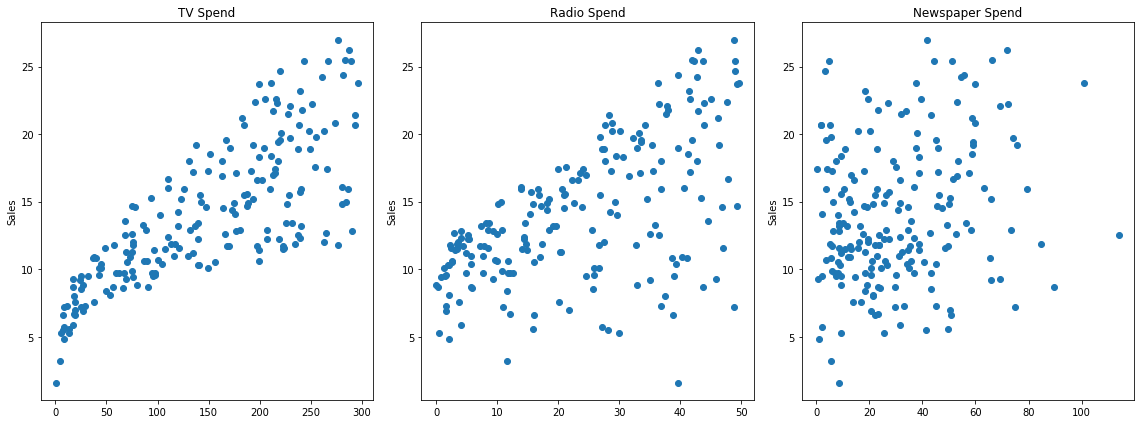

In [5]:
# Let's plot 
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Which is the relationship among the features?

> We can use the pairplot method from Seaborn.


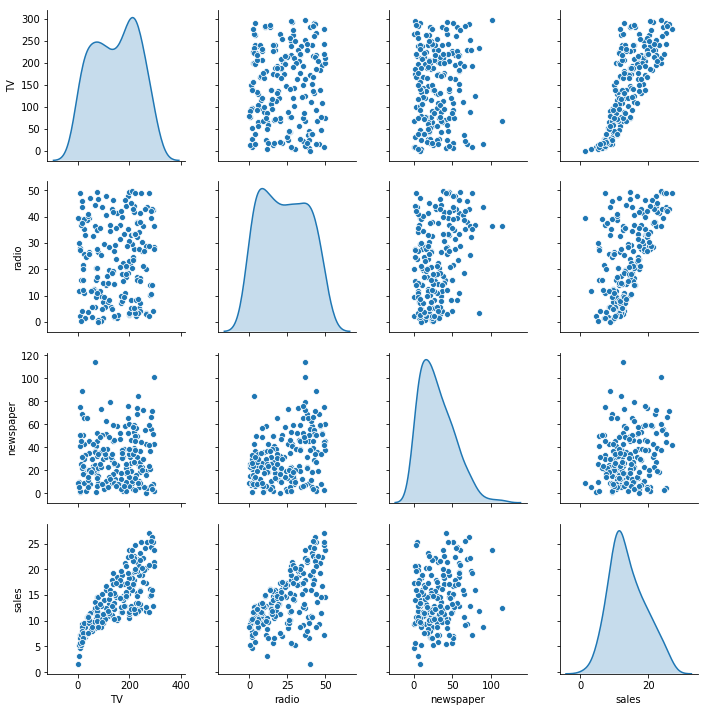

In [14]:
# Relationships between features
# sns.pairplot: Plot pairwise relationships in a dataset.
sns.pairplot(df,diag_kind='kde');

## Introducing SciKit Learn

Scikit-learn (also known as sklearn) is a free software machine learning library for the Python programming language.

It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

---

### Prepare the dataset

In [16]:
# Let's prepare our dataset and labels
X = df.drop('sales',axis=1)
y = df['sales']

print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (200, 3)
Shape of y:  (200,)


### Train | Test Split

Now we need to split our dataset into the **training set** and the **testing set**.

Scikit Learn have a multiple options to do that. 

We will use the ```train_test_split``` method from Model_selection.

**Model_selection** is a method for setting a blueprint to analyze data and then using it to measure new data.

In [7]:
from sklearn.model_selection import train_test_split

`train_test_split`: Split arrays or matrices into random train and test subsets

`X, y`: The first parameter is the dataset you're selecting to use.

`train_size`: This parameter sets the size of the training dataset. There are 3 options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.

`test_size`: This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.

`random_state`: The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number.

In [17]:
# For this model we will split training/test in 70/30 ratio.
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
type(X_train)

pandas.core.frame.DataFrame

In [23]:
print("Training/Test data: ",X_train.shape,X_test.shape)
print("Training/Test labels: ",y_train.shape, y_test.shape)

Training/Test data:  (140, 3) (60, 3)
Training/Test labels:  (140,) (60,)


In [24]:
X_train[:5]

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [25]:
y_train[:5]

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [26]:
from sklearn.linear_model import LinearRegression
# Ordinary least squares Linear Regression.

In [29]:
#help(LinearRegression)

### Instanciate an object from LinearRegression() class

In [31]:
model = LinearRegression()

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [32]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Understanding and utilizing the Model

-----

## Evaluation on the Test Set

### Metrics

The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [42]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [43]:
# We only pass in test features
# The model predicts the output
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [36]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### How good are our predictions?

Let's check the errors.

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [69]:
# Mean Absolute Error
MAE

1.2137457736144808

In [70]:
# Mean Squared Error
MSE

2.298716697886378

In [71]:
# Root Mean Squared Error
RMSE

1.5161519375993877

In [74]:
sns.hisplot(data=df,x='sales')

AttributeError: module 'seaborn' has no attribute 'hisplot'

In [72]:
df['sales'].mean()

14.022500000000003

**Review our video to understand whether these values are "good enough".**

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [45]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [60]:
# If our model was perfect, these would all be zeros.
# The model would be good if at least we have a Normal distribution of residuals.

# Which are our residuals
test_res = y_test - test_predictions
test_res.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

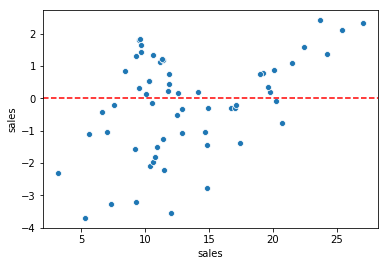

In [62]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--');

In [50]:
len(test_res)

60

In [63]:
# Some version could have issues with distplot()
sns.__version__

'0.9.0'

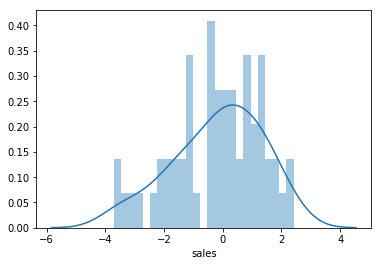

In [59]:
sns.distplot(test_res,bins=25,kde=True);

### Coefficients

In [65]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [66]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


### Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in **TV Spend** is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in **Radio Spend** is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in **Newspaper Spend** is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 

* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same.

such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

In [ ]:
df.corr()

### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [ ]:
campaign = [[149,22,12]]

In [ ]:
final_model.predict(campaign)

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_model.joblib') 

In [ ]:
loaded_model = load('sales_model.joblib')

In [ ]:
loaded_model.predict(campaign)

## Up next...
### Is this the best possible performance? Its a simple model still, let's expand on the linear regresion model by taking a further look a regularization!

-------
--------